## Black friday dataset eda and feature engineering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
## dataset link: https://www.kaggle.com/sdolezel/black-friday?select=train.csv


## Problem statement 
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.


In [98]:
#import dataset
df_train = pd.read_csv('train.csv')
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [100]:
df_test = pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [102]:
#now merge both dataset as 
df = pd.concat([df_train,df_test],ignore_index = True)

In [104]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [108]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [110]:
df.drop(['User_ID'],axis =1, inplace = True)


In [111]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [114]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [116]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [118]:
#handling categorical feature of gender 
map_gender  = {'F':0,'M':1}
df["Gender"] = df["Gender"].map(map_gender)

In [120]:
df["Gender"].value_counts()

Gender
1    590031
0    193636
Name: count, dtype: int64

In [122]:
#handle categorical feature of age given in group
df["Age"]

0          0-17
1          0-17
2          0-17
3          0-17
4           55+
          ...  
783662    26-35
783663    26-35
783664    26-35
783665    46-50
783666    46-50
Name: Age, Length: 783667, dtype: object

In [124]:
df["Age"].value_counts(ascending = True)

Age
0-17      21334
55+       30579
51-55     54784
46-50     65278
18-25    141953
36-45    156724
26-35    313015
Name: count, dtype: int64

In [126]:
#target ordinal encoding for age columns ranges 
df["Age"] = df["Age"].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4, '46-50':5,'51-55':6,'55+':7})

In [128]:
# #similar thing can be done using label encoding as 
# from sklearn.preprocessing import LabelEncoder
# #instantiate label encoder
# le = LabelEncoder()
# # encoded the column and add 1 to start encoding from 1 otherwise it will be like 0, 1, 2, 3 ....
# df["age_encoded"] = le.fit_transform(df['Age']) + 1

# print(df[['Age','age_encoded']])

# # above direct method or this one, both do similar task 

In [130]:
df["City_Category"].value_counts()

City_Category
B    329739
C    243684
A    210244
Name: count, dtype: int64

In [221]:
#converting city_category columns to one hot encoding using pd.get_dummies method 

df_city = pd.get_dummies(df["City_Category"],drop_first = True)
df_city = df_city.astype(int)

In [223]:
df = pd.concat([df,df_city],axis = 1) # concatinate two dataframe one with OHE and previous original one, axis = 1 indicates , append as columns 

In [225]:
# df.drop(columns = ['age_encoded','City_Category'],inplace = True)
df.drop('City_Category',axis = 1, inplace = True)

#### handling missing value of 2 column as 

In [228]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
B                                  0
C                                  0
dtype: int64

In [230]:
#purchase has null value, which is true as we append test data, and it is output, so that null is acceptable,we need to take care of 2 other features
df["Product_Category_2"].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [232]:
#this is categorical feature, so replacing with mode is also acceptable so 
df['Product_Category_2'] = df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])

In [146]:
df['Product_Category_3'] = df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])

In [148]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [150]:
#stay in the current city 
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [152]:
df["Stay_In_Current_City_Years"] = df['Stay_In_Current_City_Years'].str.replace("+","")

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  int32  
 12  C                           783667 non-null  int32  
dtypes: float64(3),

In [161]:
#changing data types here as,object to int
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [162]:
df['Age']= df['Age'].astype(int)

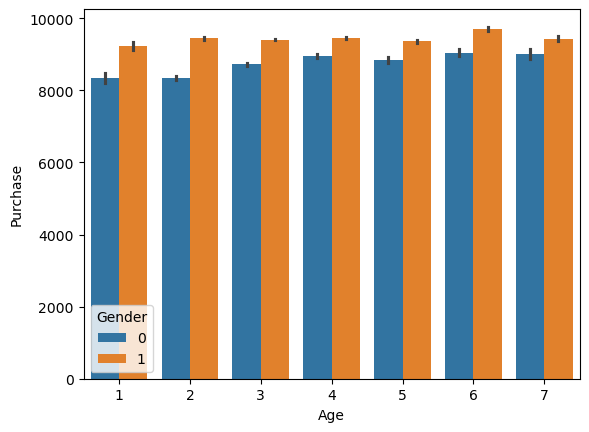

In [163]:
#visualization of age vs purchase
sns.barplot(x='Age',y='Purchase',hue = 'Gender',data = df)
plt.show()

In [86]:
#purchasing of man is high over women. 
# df = df.drop("Product_ID",axis =1, inplace = True)

In [167]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

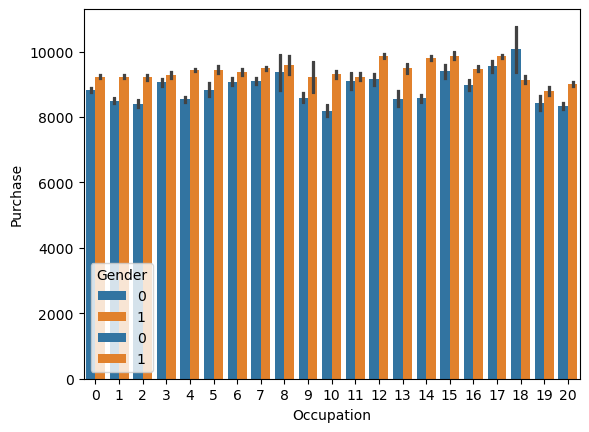

In [171]:
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df)
plt.show()

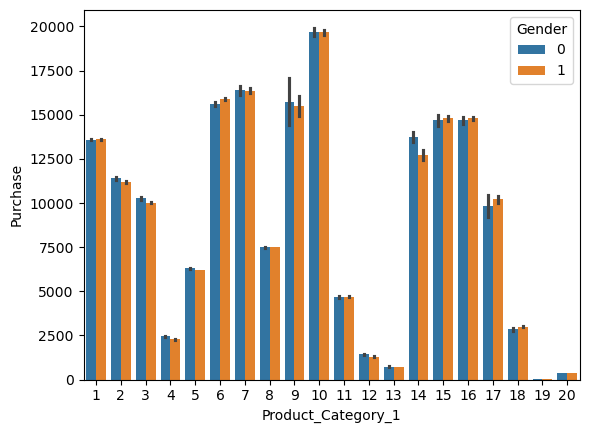

In [173]:
#visualization of product category1 and purchase 
sns.barplot( x = 'Product_Category_1', y = 'Purchase',hue="Gender",data = df)
plt.show()

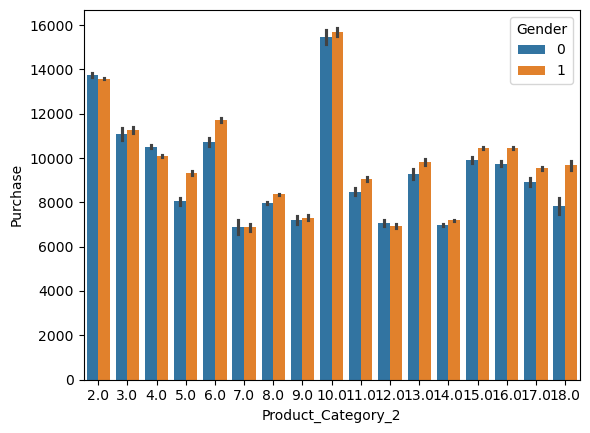

In [175]:
#visualization of product category2 and purchase 
sns.barplot( x = 'Product_Category_2', y = 'Purchase',hue="Gender",data = df)
plt.show()

In [235]:
#feature scaling
df_test = df[df["Purchase"].isnull()]

In [237]:
df_train = df[~df["Purchase"].isnull()]

In [239]:
X = df_train.drop('Purchase',axis =1)

In [241]:
y= df_train['Purchase']
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [243]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.33,random_state= 42)

In [245]:
x_train

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C,B,C
396876,P00120042,1,2,14,3,0,1,2.0,16.0,1,0,1,0
433826,P00058042,1,6,0,0,1,8,16.0,16.0,0,0,0,0
516298,P0095842,1,4,17,0,0,3,4.0,12.0,0,1,0,1
193380,P00010842,1,3,4,1,0,8,16.0,16.0,1,0,1,0
273542,P00058242,0,4,20,3,1,3,4.0,12.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,P00040642,1,5,17,2,0,5,8.0,16.0,0,1,0,1
259178,P00022542,1,3,14,2,1,5,8.0,16.0,0,1,0,1
365838,P00319042,0,2,1,1,0,5,8.0,16.0,1,0,1,0
131932,P00001742,0,2,4,2,0,8,14.0,16.0,1,0,1,0


In [253]:
# x_train.drop("Product_ID",axis = 1,inplace = True)
x_test.drop("Product_ID",axis = 1,inplace = True)

KeyError: "['Product_ID'] not found in axis"

In [255]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

ValueError: could not convert string to float: 'P00120042'

In [ ]:
dd